<a href="https://colab.research.google.com/github/ChristeenaGiji/sales-data-exploration/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files


uploaded = files.upload()


Saving ICTDAT601_AE_CS1of2_Appx_DataSet2.xlsx to ICTDAT601_AE_CS1of2_Appx_DataSet2.xlsx


# Sales Analysis

## Import libraries
Here we **import **the necessary *libraries* used in this notebook



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as plt

In [ ]:
! pip install py3dmol


In [ ]:
import py3Dmol
p=py3Dmol.view(query='mntf:1ycr')
p.setstyle({'cartoon':{'color':'spectrum'}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/ICTDAT601_AE_CS1of2_Appx_DataSet1.xlsx')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2019-06-12 00:00:00,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Australia,ACT,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

ValueError: day is out of range for month, at position 905

#Identify invalid dates in 'Order date' column

In [ ]:
def find_invalid_dates(date_series):
    invalid_dates = []
    for date in date_series:
        try:
            pd.to_datetime(date, format='%Y-%m-%d', errors='raise')
        except ValueError:
            invalid_dates.append(date)
    return invalid_dates

invalid_order_dates = find_invalid_dates(df['Order Date'])
invalid_ship_dates = find_invalid_dates(df['Ship Date'])

print("Invalid Order Dates:", invalid_order_dates)
print("Invalid Ship Dates:", invalid_ship_dates)

Invalid Order Dates: ['29/02/2019']
Invalid Ship Dates: []


In [ ]:
# Function to safely convert dates and handle errors
def safe_to_datetime(date_series):
    return pd.to_datetime(date_series, errors='coerce')

# Convert 'Order Date' and 'Ship Date' to datetime, setting invalid parsing as NaT
df['Order Date'] = safe_to_datetime(df['Order Date'])
df['Ship Date'] = safe_to_datetime(df['Ship Date'])

# Display rows with NaT dates to understand the extent of the issue
print(df[df['Order Date'].isna() | df['Ship Date'].isna()])

# Drop rows with invalid dates
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Verify that there are no more invalid dates
print(df.isnull().sum())

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
3757    3758  CA-2016-111283        NaT 2019-03-04  Standard Class   

     Customer ID  Customer Name   Segment    Country State Region  \
3757    LC-16870  Lena Cacioppo  Consumer  Australia   NSW   East   

           Product ID         Category Sub-Category Product Name    Sales  \
3757  OFF-AR-10001615  Office Supplies          Art    Newell 34  111.104   

      Quantity  Discount  Profit  
3757         7       0.2  8.3328  
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


#Order date converted to date time data type

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
# Summary statistics


In [ ]:
print(df.describe())

            Row ID                     Order Date  \
count  9993.000000                           9993   
mean   4997.623737  2021-03-21 19:53:17.958571008   
min       1.000000            2019-01-02 00:00:00   
25%    2499.000000            2019-12-23 00:00:00   
50%    4998.000000            2021-04-30 00:00:00   
75%    7496.000000            2022-05-14 00:00:00   
max    9994.000000            2022-12-30 00:00:00   
std    2885.281661                            NaN   

                           Ship Date         Sales     Quantity     Discount  \
count                           9993   9993.000000  9993.000000  9993.000000   
mean   2021-03-17 21:27:15.184628992    229.869885     3.789252     0.156198   
min              2018-01-01 00:00:00      0.444000     1.000000     0.000000   
25%              2019-12-19 00:00:00     17.280000     2.000000     0.000000   
50%              2021-04-28 00:00:00     54.480000     3.000000     0.200000   
75%              2022-05-12 00:00:00    20

In [ ]:
# Information about the dataframe


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9993 non-null   int64         
 1   Order ID       9993 non-null   object        
 2   Order Date     9993 non-null   datetime64[ns]
 3   Ship Date      9993 non-null   datetime64[ns]
 4   Ship Mode      9993 non-null   object        
 5   Customer ID    9993 non-null   object        
 6   Customer Name  9993 non-null   object        
 7   Segment        9993 non-null   object        
 8   Country        9993 non-null   object        
 9   State          9993 non-null   object        
 10  Region         9993 non-null   object        
 11  Product ID     9993 non-null   object        
 12  Category       9993 non-null   object        
 13  Sub-Category   9993 non-null   object        
 14  Product Name   9993 non-null   object        
 15  Sales          9993 non-nu

In [ ]:
# Distribution of Sales


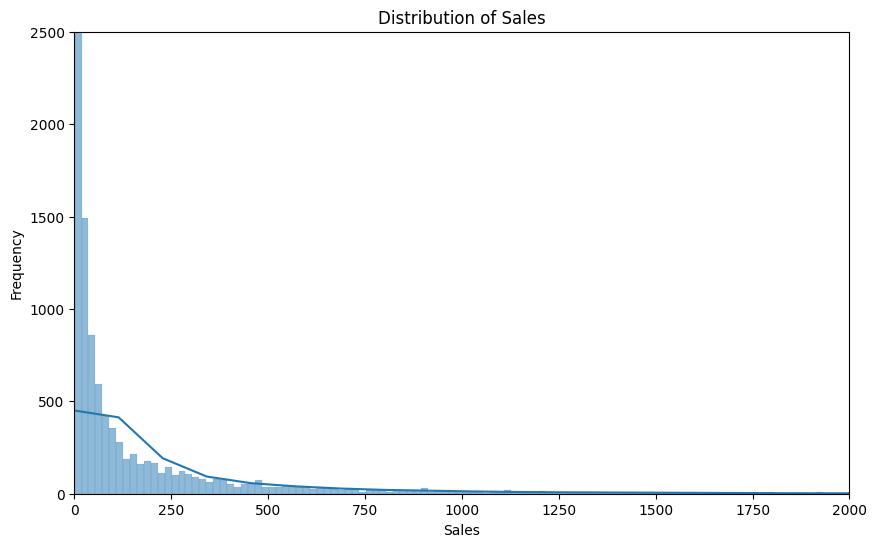

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # Set the x-axis limits as needed
plt.ylim(0, 2500)   # Set the y-axis limits as needed
plt.show()

In [ ]:
max_sales = df['Sales'].max()
print("Maximum Sales:", max_sales)

Maximum Sales: 22638.48


# Get the frequency count of each unique sales value and Find the maximum frequency

In [ ]:
sales_counts = df['Sales'].value_counts()
max_sales_frequency = sales_counts.max()
print("Maximum Frequency of Sales",max_sales_frequency)

Maximum Frequency of Sales 56


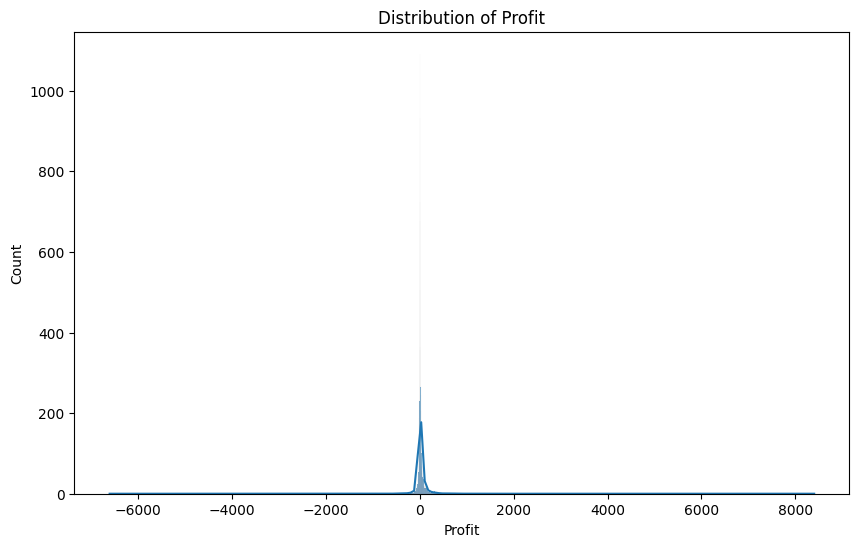

In [ ]:
# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.show()

In [ ]:
# Count plot for each categorical variable
categorical_vars = ['Category', 'Ship Mode', 'Segment', 'Region']

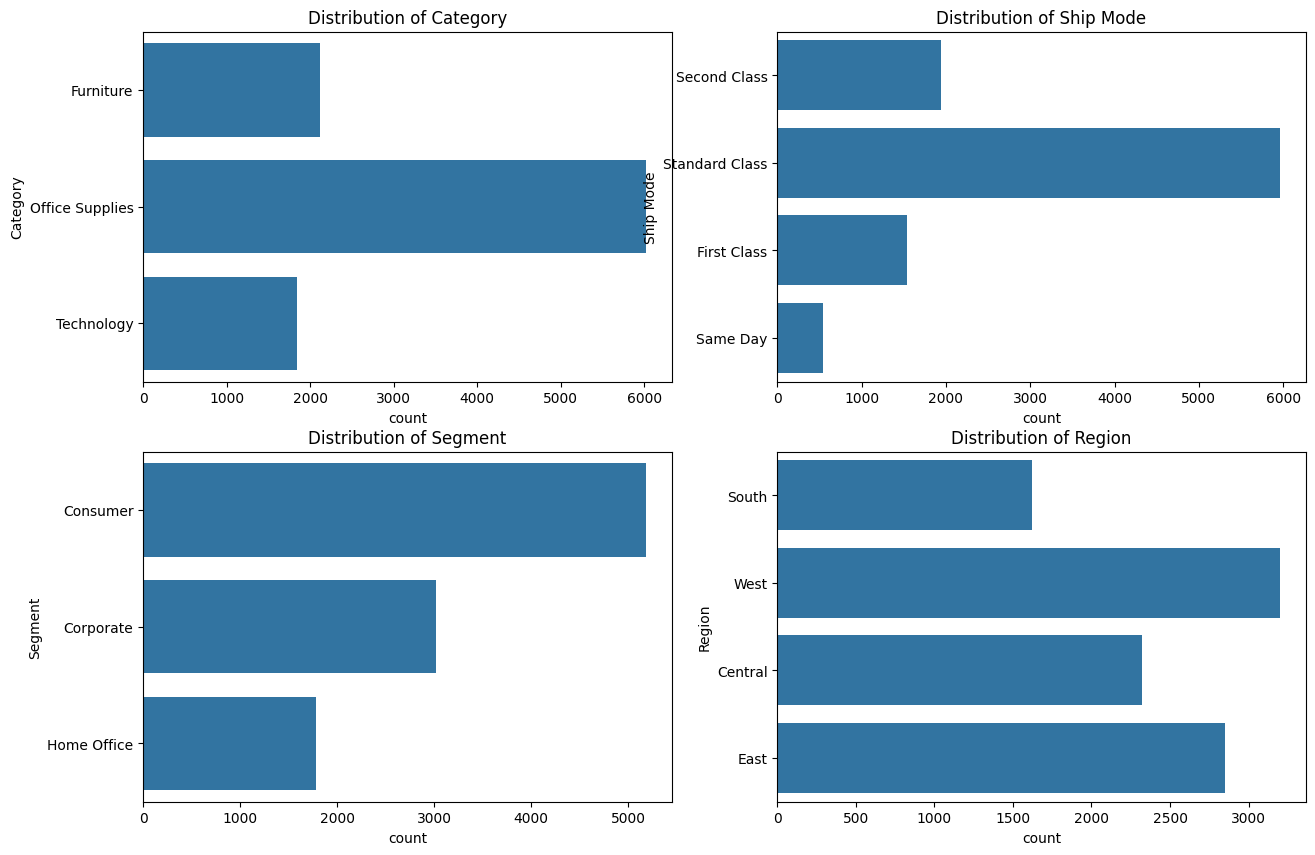

In [ ]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[var])
    plt.title(f'Distribution of {var}')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

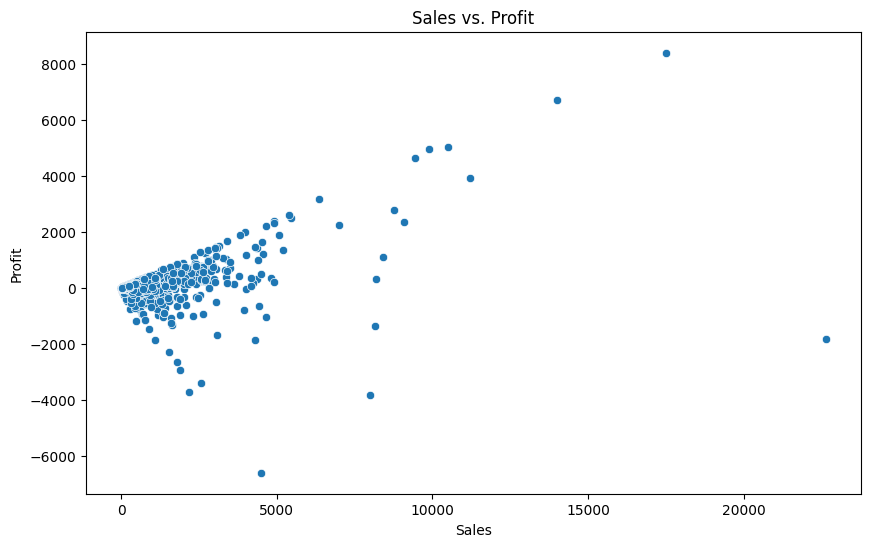

In [ ]:
# Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

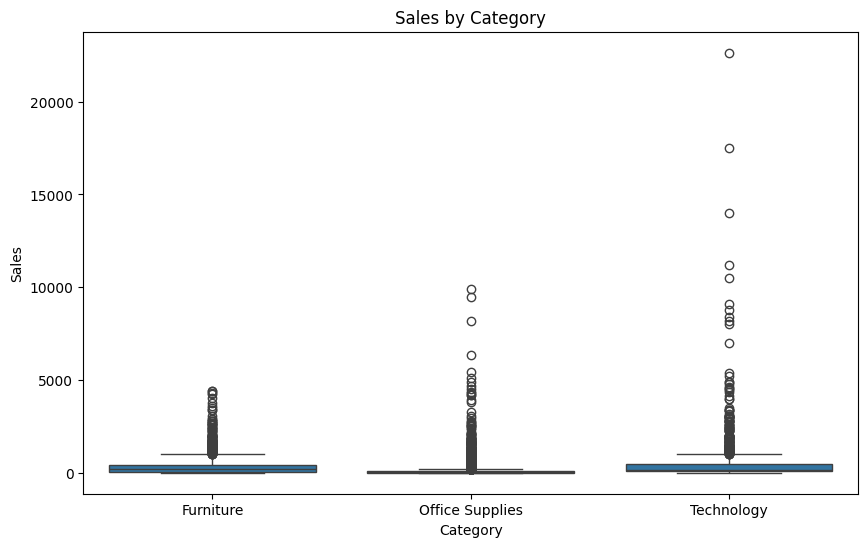

In [ ]:
# Boxplot of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()

In [ ]:
# Sales over time
df.set_index('Order Date', inplace=True)
sales_over_time = df['Sales'].resample('M').sum()

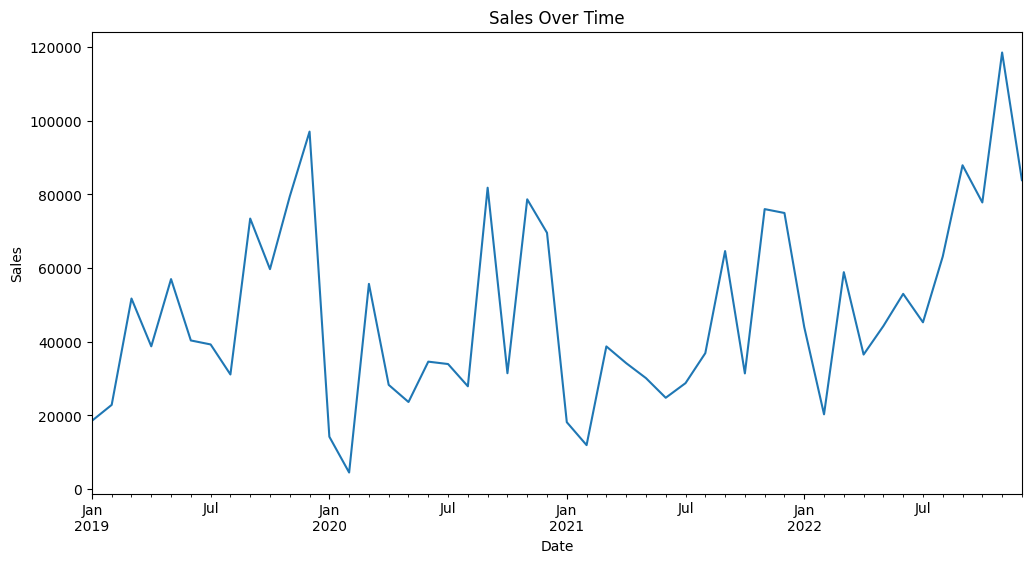

In [ ]:
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

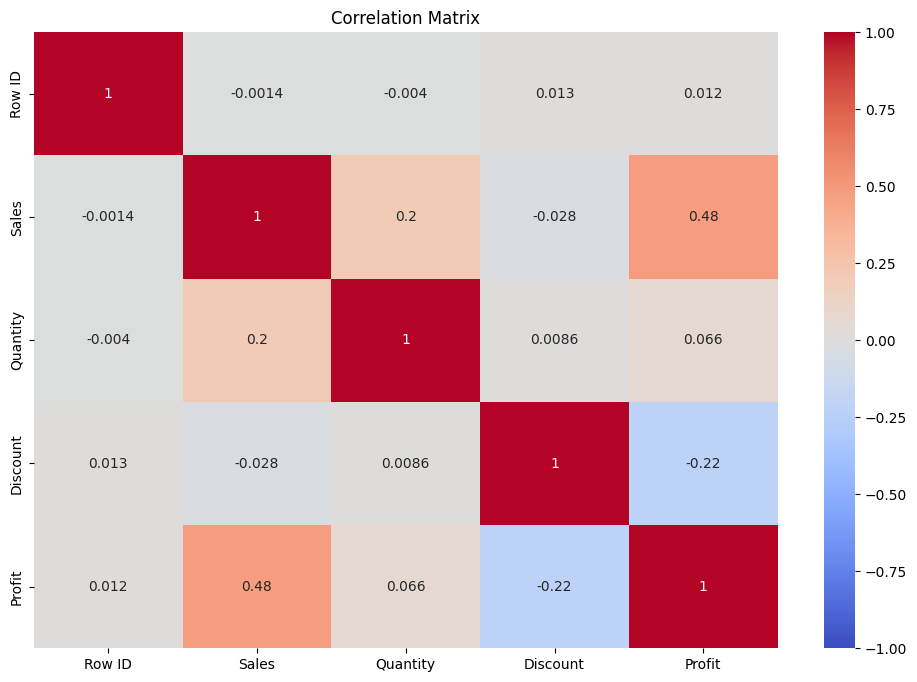

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
